This notebook will explore the use of Naive Bayes probability, using "Toto" (A lottery game based in Singapore where players must predict up to 6 winning numbers)

# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import the data set

In [2]:
df = pd.read_csv("toto.csv")

In [3]:
df.head()

,num_1,num_2,num_3,num_4,num_5,num_6,add_num
0,3,4,18,32,41,44,34
1,7,38,40,45,46,47,21
2,5,10,22,30,42,48,13
3,10,13,21,27,34,40,41
4,1,2,13,18,41,47,46


# Generate a frequency table of the counts of numbers

In [4]:
freq_dict = {}

for i in range(1, 50):
    freq_dict[i] = 0

In [5]:
for each_col in df.columns:
    col_count_to_dict = dict(df[each_col].value_counts())

    for key in col_count_to_dict:
        freq_dict[key] += col_count_to_dict[key]

In [6]:
freq_dict

{1: 170,
 2: 159,
 3: 151,
 4: 158,
 5: 159,
 6: 175,
 7: 162,
 8: 177,
 9: 177,
 10: 156,
 11: 166,
 12: 174,
 13: 166,
 14: 159,
 15: 174,
 16: 165,
 17: 187,
 18: 171,
 19: 156,
 20: 165,
 21: 172,
 22: 197,
 23: 184,
 24: 162,
 25: 153,
 26: 160,
 27: 173,
 28: 163,
 29: 173,
 30: 162,
 31: 190,
 32: 171,
 33: 152,
 34: 152,
 35: 144,
 36: 174,
 37: 151,
 38: 155,
 39: 160,
 40: 170,
 41: 169,
 42: 154,
 43: 156,
 44: 159,
 45: 146,
 46: 86,
 47: 66,
 48: 75,
 49: 65}

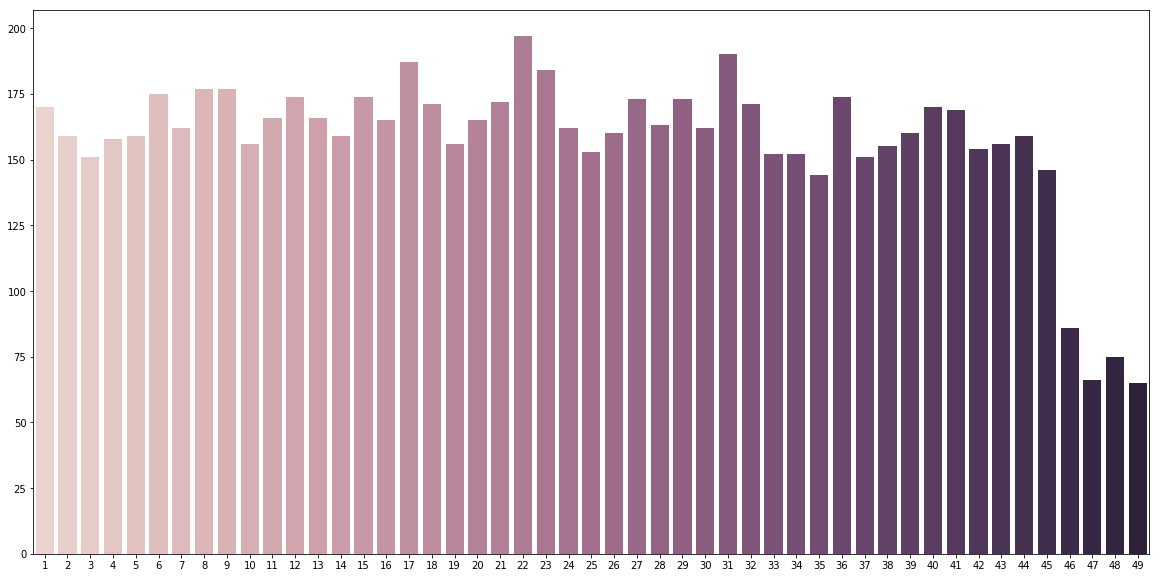

In [7]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(
    x=[key for key in freq_dict],
    y=[freq_dict[key] for key in freq_dict],
    palette=sns.cubehelix_palette(49)
)

# Calculate the probabilities of each number randomly being picked

## (NOTE: This is different from the probability of a number appearing in a set)

In [19]:
# total_count = sum(freq_dict[k] for k in freq_dict)

# prob_dict = {}

# for each_key in freq_dict:
#     prob_dict[each_key] = freq_dict[each_key] / total_count

In [20]:
# prob_dict

{1: 0.022037853253824215,
 2: 0.020611874513870886,
 3: 0.01944516463572725,
 4: 0.02035260565206119,
 5: 0.020611874513870886,
 6: 0.022686025408348458,
 7: 0.02100077780658543,
 8: 0.022945294270158154,
 9: 0.022945294270158154,
 10: 0.02022297122115634,
 11: 0.02151931553020482,
 12: 0.022556390977443608,
 13: 0.02151931553020482,
 14: 0.020611874513870886,
 15: 0.022556390977443608,
 16: 0.021389681099299975,
 17: 0.024241638579206637,
 18: 0.022037853253824215,
 19: 0.02022297122115634,
 20: 0.021389681099299975,
 21: 0.02229712211563391,
 22: 0.02553798288825512,
 23: 0.023852735286492094,
 24: 0.02100077780658543,
 25: 0.019834067928441793,
 26: 0.020741508944775732,
 27: 0.02242675654653876,
 28: 0.02113041223749028,
 29: 0.02242675654653876,
 30: 0.02100077780658543,
 31: 0.024630541871921183,
 32: 0.022037853253824215,
 33: 0.019704433497536946,
 34: 0.019574799066632096,
 35: 0.01866735805029816,
 36: 0.022556390977443608,
 37: 0.019574799066632096,
 38: 0.02009333679025149,

# Calculate the probabilities of each element (1 to 49) being the first, second, third, ..., last number to be drawn

In [8]:
# num_count = {
#     'first': {},
#     'second': {},
#     'third': {},
#     'fourth': {},
#     'fifth': {},
#     'sixth': {},
#     'additional': {}
# }

# for i, each_place in enumerate(num_count):
#     for j in range(1, 50):
#         num_count[each_place][j] = 0
    
#     if (each_place != 'additional'):
#         num_count_dict = dict(df['num_' + str(i+1)].value_counts())

#         for each_key in num_count_dict:
#             num_count[each_place][each_key] += num_count_dict[each_key]
#     else:
#         num_count_dict = dict(df['add_num'].value_counts())

#         for each_key in num_count_dict:
#             num_count[each_place][each_key] += num_count_dict[each_key]

In [58]:
# for each_place in num_count:
#     total_num_counts = sum([num_count[each_place][i] for i in num_count[each_place]])
#     assert total_num_counts == df.shape[0]

In [59]:
# num_prob = {
#     'first': {},
#     'second': {},
#     'third': {},
#     'fourth': {},
#     'fifth': {},
#     'sixth': {},
#     'additional': {}
# }

# for each_place in num_count:

#     total_num_pos_count = sum(num_count[each_place][key] for key in num_count[each_place])

#     for each_num in num_count[each_place]:
#         num_prob[each_place][each_num] = num_count[each_place][each_num] / total_num_pos_count

In [60]:
# num_prob

{'first': {1: 0.12250453720508167,
  2: 0.11161524500907441,
  3: 0.08983666061705989,
  4: 0.08620689655172414,
  5: 0.08711433756805807,
  6: 0.07441016333938294,
  7: 0.05989110707803993,
  8: 0.0662431941923775,
  9: 0.0544464609800363,
  10: 0.03357531760435572,
  11: 0.04446460980036298,
  12: 0.028130671506352088,
  13: 0.023593466424682397,
  14: 0.020871143375680582,
  15: 0.014519056261343012,
  16: 0.018148820326678767,
  17: 0.015426497277676952,
  18: 0.009074410163339383,
  19: 0.003629764065335753,
  20: 0.007259528130671506,
  21: 0.0054446460980036296,
  22: 0.008166969147005444,
  23: 0.0009074410163339383,
  24: 0.004537205081669692,
  25: 0.003629764065335753,
  26: 0.0009074410163339383,
  27: 0.0009074410163339383,
  28: 0.0009074410163339383,
  29: 0.0009074410163339383,
  30: 0.0,
  31: 0.0018148820326678765,
  32: 0.0,
  33: 0.0,
  34: 0.0,
  35: 0.0009074410163339383,
  36: 0.0,
  37: 0.0,
  38: 0.0,
  39: 0.0,
  40: 0.0,
  41: 0.0,
  42: 0.0,
  43: 0.0,
  44:

# Calculate the joint probabilities of elements being chosen together

The probabilities will be stored in a dictionary with the keys as tuples. The elements in the tuple indicate the joint probabilities of the elements appearing in a set. We will only store up to 5-element probabilities, since this joint probability will be used for the conditional probability calculation later.

In [7]:
df_arr = df.values

In [8]:
df_arr

array([[ 3,  4, 18, ..., 41, 44, 34],
       [ 7, 38, 40, ..., 46, 47, 21],
       [ 5, 10, 22, ..., 42, 48, 13],
       ...,
       [22, 32, 41, ..., 43, 44, 31],
       [ 2, 18, 19, ..., 39, 45, 36],
       [ 6, 11, 14, ..., 28, 45, 35]])

In [9]:
joint_prob_dict = {}

To help speed up the calculation and search space, we will maintain a dictionary to store the list of indexes in the array, which contain the numbers in the tuple. For example, if we are looking for sets of numbers that contain 1, 2, and 3, then we will only look at the sets of numbers that already contain 1 and 2. This narrows the search space required, instead of having to look through the entire data set.

In [10]:
non_zero_occur_index = {}

## Calculating the joint probabilities of 2 elements being chosen together

In [25]:
def calculate_joint_prob(value_arr):
    for i in range(1, 50):
        for j in range(i+1, 50):
            count_occurrence = 0

            # Count the number of occurrences that these 2 numbers have appeared in a winning set,
            # over all winning sets in the past 10 years
            for index, each_winning_set in enumerate(value_arr):
                if ((i in each_winning_set) and (j in each_winning_set)):
                    count_occurrence += 1

                    if ((i, j) in non_zero_occur_index):
                        non_zero_occur_index[(i, j)].append(index)
                    else:
                        non_zero_occur_index[(i, j)] = [index]

            joint_prob_dict[(i, j)] = count_occurrence / len(df_arr)

In [ ]:
calculate_joint_prob(df_arr)

In [12]:
len(joint_prob_dict)

1176

In [13]:
len(non_zero_occur_index)

1176

## Calculating the joint probabilities of 3 elements being chosen together

In [121]:
# for i in range(1, 50):
#     for j in range(i+1, 50):
#         for k in range(j+1, 50):
            
#             if ((i, j) in non_zero_occur_index):
#                 count_occurrence = 0

#                 # Count the number of occurrences that these 3 numbers have appeared in a winning set,
#                 # over all winning sets in the past 10 years
#                 for each_winning_set_index in non_zero_occur_index[(i, j)]:
#                     if ((i in df_arr[each_winning_set_index]) and (j in df_arr[each_winning_set_index]) and (k in df_arr[each_winning_set_index])):
#                         count_occurrence += 1
                        
#                         if ((i, j, k) in non_zero_occur_index):
#                             non_zero_occur_index[(i, j, k)].append(each_winning_set_index)
#                         else:
#                             non_zero_occur_index[(i, j, k)] = [each_winning_set_index]

#                 joint_prob_dict[(i, j, k)] = count_occurrence / len(df_arr)

In [122]:
# len(joint_prob_dict)

19600

In [123]:
# len(non_zero_occur_index)

16809

## Calculating the joint probabilities of 4 elements being chosen together

In [124]:
# for i in range(1, 50):
#     for j in range(i+1, 50):
#         for k in range(j+1, 50):
#             for x in range(k+1, 50):
                
#                 if ((i, j, k) in non_zero_occur_index):
#                     count_occurrence = 0

#                     # Count the number of occurrences that these 4 numbers have appeared in a winning set,
#                     # over all winning sets in the past 10 years
#                     for each_winning_set_index in non_zero_occur_index[(i, j, k)]:
#                         if ((i in df_arr[each_winning_set_index]) and (j in df_arr[each_winning_set_index]) and (k in df_arr[each_winning_set_index]) and (x in df_arr[each_winning_set_index])):
#                             count_occurrence += 1
                            
#                             if ((i, j, k, x) in non_zero_occur_index):
#                                 non_zero_occur_index[(i, j, k, x)].append(each_winning_set_index)
#                             else:
#                                 non_zero_occur_index[(i, j, k, x)] = [each_winning_set_index]

#                     joint_prob_dict[(i, j, k, x)] = count_occurrence / len(df_arr)

In [125]:
# len(joint_prob_dict)

213198

In [126]:
# len(non_zero_occur_index)

51812

## Calculating the joint probabilities of 5 elements being chosen together

In [127]:
# for i in range(1, 50):
#     for j in range(i+1, 50):
#         for k in range(j+1, 50):
#             for x in range(k+1, 50):
#                 for y in range(x+1, 50):
                    
#                     if ((i, j, k, x) in non_zero_occur_index):
#                         count_occurrence = 0

#                         # Count the number of occurrences that these 4 numbers have appeared in a winning set,
#                         # over all winning sets in the past 10 years
#                         for each_winning_set_index in non_zero_occur_index[(i, j, k, x)]:
#                             if ((i in df_arr[each_winning_set_index]) and (j in df_arr[each_winning_set_index]) and (k in df_arr[each_winning_set_index]) and (x in df_arr[each_winning_set_index]) and (y in df_arr[each_winning_set_index])):
#                                 count_occurrence += 1
                                
#                                 if ((i, j, k, x, y) in non_zero_occur_index):
#                                     non_zero_occur_index[(i, j, k, x, y)].append(each_winning_set_index)
#                                 else:
#                                     non_zero_occur_index[(i, j, k, x, y)] = [each_winning_set_index]

#                         joint_prob_dict[(i, j, k, x, y)] = count_occurrence / len(df_arr)

In [128]:
# len(joint_prob_dict)

594700

In [129]:
# len(non_zero_occur_index)

74821

## Calculating the joint probabilities of 6 elements being chosen together

In [156]:
# for i in range(1, 50):
#     for j in range(i+1, 50):
#         for k in range(j+1, 50):
#             for x in range(k+1, 50):
#                 for y in range(x+1, 50):
#                     for z in range(y+1, 50):
                    
#                         if ((i, j, k, x, y) in non_zero_occur_index):
#                             count_occurrence = 0

#                             # Count the number of occurrences that these 6 numbers have appeared in a winning set,
#                             # over all winning sets in the past 10 years
#                             for each_winning_set_index in non_zero_occur_index[(i, j, k, x, y)]:
#                                 if ((i in df_arr[each_winning_set_index]) and (j in df_arr[each_winning_set_index]) and (k in df_arr[each_winning_set_index]) and (x in df_arr[each_winning_set_index]) and (y in df_arr[each_winning_set_index]) and (z in df_arr[each_winning_set_index])):
#                                     count_occurrence += 1

#                                     if ((i, j, k, x, y, z) in non_zero_occur_index):
#                                         non_zero_occur_index[(i, j, k, x, y, z)].append(each_winning_set_index)
#                                     else:
#                                         non_zero_occur_index[(i, j, k, x, y, z)] = [each_winning_set_index]

#                             joint_prob_dict[(i, j, k, x, y, z)] = count_occurrence / len(df_arr)

In [187]:
# len(joint_prob_dict)

811509

In [158]:
# len(non_zero_occur_index)

82534

# Calculate the conditional probabilities of each element being selected with another element

Recall that the formula for conditional probability is as follows:

$$P(B | A) =  \frac{P(A and B)}{P(A)}$$

This implies that the events A and B are <b>NOT INDEPENDENT</b>.

In [14]:
cond_prob_dict = {}

## Let's calculate the probabilities of an element appearing in a set

In [15]:
prob_num_in_set = {}

In [16]:
for each_num in freq_dict:
    total_num_appearance = freq_dict[each_num]
    
    prob_num_in_set[each_num] = total_num_appearance / df.shape[0]

In [17]:
prob_num_in_set

{1: 0.1541251133272892,
 2: 0.1441523118766999,
 3: 0.13689936536718042,
 4: 0.14324569356300998,
 5: 0.1441523118766999,
 6: 0.1586582048957389,
 7: 0.1468721668177697,
 8: 0.16047144152311876,
 9: 0.16047144152311876,
 10: 0.1414324569356301,
 11: 0.15049864007252947,
 12: 0.15775158658204896,
 13: 0.15049864007252947,
 14: 0.1441523118766999,
 15: 0.15775158658204896,
 16: 0.14959202175883954,
 17: 0.16953762466001812,
 18: 0.15503173164097914,
 19: 0.1414324569356301,
 20: 0.14959202175883954,
 21: 0.1559383499546691,
 22: 0.1786038077969175,
 23: 0.16681776971894832,
 24: 0.1468721668177697,
 25: 0.1387126019945603,
 26: 0.14505893019038985,
 27: 0.15684496826835903,
 28: 0.14777878513145964,
 29: 0.15684496826835903,
 30: 0.1468721668177697,
 31: 0.17225747960108795,
 32: 0.15503173164097914,
 33: 0.13780598368087035,
 34: 0.13780598368087035,
 35: 0.13055303717135086,
 36: 0.15775158658204896,
 37: 0.13689936536718042,
 38: 0.14052583862194015,
 39: 0.14505893019038985,
 40: 0.1

In [18]:
sorted_prob_num_in_set = sorted(prob_num_in_set.items(), key=lambda kv: kv[1], reverse=True)

In [19]:
sorted_prob_num_in_set

[(22, 0.1786038077969175),
 (31, 0.17225747960108795),
 (17, 0.16953762466001812),
 (23, 0.16681776971894832),
 (8, 0.16047144152311876),
 (9, 0.16047144152311876),
 (6, 0.1586582048957389),
 (12, 0.15775158658204896),
 (15, 0.15775158658204896),
 (36, 0.15775158658204896),
 (27, 0.15684496826835903),
 (29, 0.15684496826835903),
 (21, 0.1559383499546691),
 (18, 0.15503173164097914),
 (32, 0.15503173164097914),
 (1, 0.1541251133272892),
 (40, 0.1541251133272892),
 (41, 0.15321849501359927),
 (11, 0.15049864007252947),
 (13, 0.15049864007252947),
 (16, 0.14959202175883954),
 (20, 0.14959202175883954),
 (28, 0.14777878513145964),
 (7, 0.1468721668177697),
 (24, 0.1468721668177697),
 (30, 0.1468721668177697),
 (26, 0.14505893019038985),
 (39, 0.14505893019038985),
 (2, 0.1441523118766999),
 (5, 0.1441523118766999),
 (14, 0.1441523118766999),
 (44, 0.1441523118766999),
 (4, 0.14324569356300998),
 (10, 0.1414324569356301),
 (19, 0.1414324569356301),
 (43, 0.1414324569356301),
 (38, 0.1405258

## Then, we'll calculate the conditional probabilities of 1 element appearing, given another single element having appeared

In [20]:
for i in range(1, 50):
    for j in range(1, 50):
        
        if (i == j):
            cond_prob_dict[(i, (j,))] = 0
        else:
            if (
                (((j, i) in joint_prob_dict) or ((i, j) in joint_prob_dict)) and 
                (i in prob_num_in_set) and 
                (prob_num_in_set[i] > 0)
            ):
                try:
                    cond_prob_dict[(i, (j,))] = joint_prob_dict[(j, i)] / prob_num_in_set[j]
                except KeyError as error:
                    cond_prob_dict[(i, (j,))] = joint_prob_dict[(i, j)] / prob_num_in_set[j]
            else:
                cond_prob_dict[(i, (j,))] = 0

In [21]:
cond_prob_dict

{(1, (1,)): 0,
 (1, (2,)): 0.11949685534591195,
 (1, (3,)): 0.13245033112582782,
 (1, (4,)): 0.13924050632911392,
 (1, (5,)): 0.16352201257861634,
 (1, (6,)): 0.12571428571428572,
 (1, (7,)): 0.10493827160493828,
 (1, (8,)): 0.13559322033898305,
 (1, (9,)): 0.096045197740113,
 (1, (10,)): 0.1346153846153846,
 (1, (11,)): 0.12650602409638553,
 (1, (12,)): 0.13218390804597702,
 (1, (13,)): 0.1566265060240964,
 (1, (14,)): 0.11949685534591195,
 (1, (15,)): 0.1264367816091954,
 (1, (16,)): 0.15757575757575756,
 (1, (17,)): 0.09090909090909091,
 (1, (18,)): 0.16374269005847955,
 (1, (19,)): 0.10897435897435896,
 (1, (20,)): 0.08484848484848484,
 (1, (21,)): 0.11627906976744184,
 (1, (22,)): 0.17258883248730963,
 (1, (23,)): 0.125,
 (1, (24,)): 0.14197530864197533,
 (1, (25,)): 0.1503267973856209,
 (1, (26,)): 0.15625,
 (1, (27,)): 0.1329479768786127,
 (1, (28,)): 0.12883435582822086,
 (1, (29,)): 0.11560693641618497,
 (1, (30,)): 0.11728395061728396,
 (1, (31,)): 0.14736842105263157,
 (1, (

Conducting a sanity check to ensure that we don't have probabilities exceeding 1

In [22]:
for each_cond_prob in cond_prob_dict:
    assert cond_prob_dict[each_cond_prob] < 1

## Next, we'll calculate the conditional probabilities of each element appearing, given a set of joint probabilities consisting of other elements (i.e. more than 1 element)

In [23]:
# for i in range(1, 50):
#     for each_set_of_elements in joint_prob_dict:
        
#         if (i in each_set_of_elements):
#             cond_prob_dict[(i, each_set_of_elements)] = 0
#         else:
#             _temp_list = list(each_set_of_elements)
#             _temp_list.append(i)
#             _temp_list.sort()
            
#             new_joint_prob_set = tuple(_temp_list)
            
#             if (
#                 (new_joint_prob_set in joint_prob_dict) and 
#                 (joint_prob_dict[each_set_of_elements] > 0)
#             ):
#                 cond_prob_dict[(i, each_set_of_elements)] = joint_prob_dict[new_joint_prob_set] / joint_prob_dict[each_set_of_elements]
#             else:
#                 cond_prob_dict[(i, each_set_of_elements)] = 0

Conduct another sanity check to ensure that we don't have probabilities exceeding 1

In [24]:
# for i in df_arr:
#     if ((2 in i) and (3 in i) and (10 in i)):
#         print(i)

In [25]:
# print(joint_prob_dict[(1, 2, 3, 10)])
# print(joint_prob_dict[(2, 3, 10)])

In [26]:
# for each_cond_prob in cond_prob_dict:
#     try:
#         assert (cond_prob_dict[each_cond_prob] <= 1)
#     except AssertionError as error:
#         print(str(each_cond_prob) + " - " + str(cond_prob_dict[each_cond_prob]))

# Calculate the posterior probabilities of different possible sets of numbers

Recall that the Naive Bayes theorem is represented as:

$$P(B|A) = \frac{P(B) \times  P(A|B)}{P(A)}$$

## A simple function to check if the numbers that we're trying for, have appeared before

In [23]:
def check_winning_number_set(num_1, num_2, num_3, num_4, num_5, num_6, num_7=None):
    for each_set in df_arr:
        if (
            (num_1 in each_set) and 
            (num_2 in each_set) and 
            (num_3 in each_set) and 
            (num_4 in each_set) and 
            (num_5 in each_set) and 
            (num_6 in each_set)
        ):
            print("This set:\n | {} | {} | {} | {} | {} | {} | \nhas occurred before.".format(num_1, num_2, num_3, num_4, num_5, num_6))
            
            if (num_7 is not None):
                if (num_7 in each_set):
                    print("Along with this additional number: | {} |".format(num_7))
                else:
                    print("But this additional number: {}\n has not occurred before.".format(num_7))
                    
            return
            
    print("This set:\n | {} | {} | {} | {} | {} | {} | \nhas NEVER occurred before.".format(num_1, num_2, num_3, num_4, num_5, num_6))
    
    

## Fitting the Naive Bayes algorithm into a function for ease of use

In [24]:
def generate_my_numbers(starting_num):

    cond_prob_dict_fix_start = {}
    cond_list = [starting_num]

    for i in range(0, 6):    # We iterate 6 times because we want to predict the highest probability for 6 numbers
        curr_max_prob_dict = {}    # We re-initialize a dictionary to store the conditional probabilities of this current Naive Bayes run
        for j in range(1, 50):    # Iterating through all 49 possible numbers to get the highest probability
            if (j not in cond_list):

                nbayes_numer = prob_num_in_set[j]
                nbayes_denom = 1

                # We calculate the numerator and denominators respectively as per the Naive Bayes algorithm
                for each_cond in cond_list:
                    nbayes_numer = np.multiply(nbayes_numer, cond_prob_dict[(each_cond, (j,))])
                    nbayes_denom = np.multiply(nbayes_denom, prob_num_in_set[each_cond])

                # We obtain the final calculation for the Naive Bayes-based probability for a given number selected
                curr_max_prob_dict[j, tuple(cond_list)] = np.divide(
                    nbayes_numer,
                    nbayes_denom
                )

        _cond_tuple_w_score = sorted(curr_max_prob_dict.items(), key=lambda k: k[1], reverse=True)[0]
        _cond_tuple = _cond_tuple_w_score[0]
        cond_prob_dict_fix_start[_cond_tuple] = _cond_tuple_w_score[1]
        _temp_list = list(_cond_tuple[1])
        _temp_list.append(_cond_tuple[0])
        sorted(_temp_list)

        cond_list = _temp_list
        
    return cond_prob_dict_fix_start


## Given that we select the first number based on, the number with the highest probability of being selected as the first number

In [144]:
generate_my_numbers(1)

{(22, (1,)): 0.2,
 (36, (1, 22)): 0.19193274369085986,
 (32, (1, 22, 36)): 0.1904935316716198,
 (16, (1, 22, 36, 32)): 0.1541593672177823,
 (31, (1, 22, 36, 32, 16)): 0.1337692251538544,
 (34, (1, 22, 36, 32, 16, 31)): 0.09830694315590904}

## Given that we select the first number based on, the number with the highest probability of appearing across all sets

In [145]:
generate_my_numbers(22)

{(32, (22,)): 0.20304568527918782,
 (36, (22, 32)): 0.21282690652180367,
 (31, (22, 32, 36)): 0.15293746058493607,
 (6, (22, 32, 36, 31)): 0.16071486640561486,
 (1, (22, 32, 36, 31, 6)): 0.11388432261909207,
 (35, (22, 32, 36, 31, 6, 1)): 0.12388914933231139}

## Given that we select the first number based on, the number with the 2nd highest probability of appearing across all sets

In [26]:
generate_my_numbers(31)

{(22, (31,)): 0.19999999999999998,
 (32, (31, 22)): 0.193009016440826,
 (36, (31, 22, 32)): 0.1775166953218008,
 (6, (31, 22, 32, 36)): 0.16071486640561486,
 (1, (31, 22, 32, 36, 6)): 0.11388432261909208,
 (35, (31, 22, 32, 36, 6, 1)): 0.12388914933231136}

# Attempt to do k-Fold Validation on the data set to test out our Naive Bayes algorithm

In [36]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
kf.get_n_splits(df_arr)

for train_index, test_index in kf.split(df_arr):
    train_data = df_arr[train_index]
    test_data = df_arr[test_index]
    
    joint_prob_dict = {}
    non_zero_occur_index = {}

    calculate_joint_prob(train_data)
    
    cond_prob_dict = {}
    prob_num_in_set = {}
    
    freq_dict = {}

    for i in range(1, 50):
        freq_dict[i] = 0
        
    for each_col in df.columns:
        col_count_to_dict = dict(df[each_col].value_counts())

        for key in col_count_to_dict:
            freq_dict[key] += col_count_to_dict[key]
    
    for each_num in freq_dict:
        total_num_appearance = freq_dict[each_num]

        prob_num_in_set[each_num] = total_num_appearance / df.shape[0]
        
    sorted_prob_num_in_set = sorted(prob_num_in_set.items(), key=lambda kv: kv[1], reverse=True)
    
    for i in range(1, 50):
        for j in range(1, 50):

            if (i == j):
                cond_prob_dict[(i, (j,))] = 0
            else:
                if (
                    (((j, i) in joint_prob_dict) or ((i, j) in joint_prob_dict)) and 
                    (i in prob_num_in_set) and 
                    (prob_num_in_set[i] > 0)
                ):
                    try:
                        cond_prob_dict[(i, (j,))] = joint_prob_dict[(j, i)] / prob_num_in_set[j]
                    except KeyError as error:
                        cond_prob_dict[(i, (j,))] = joint_prob_dict[(i, j)] / prob_num_in_set[j]
                else:
                    cond_prob_dict[(i, (j,))] = 0
    
    # Generate results based on number with the highest first drawn probability
    highest_first_drawn = sorted(freq_dict.items(), key=lambda kv: kv[1], reverse=True)[0][0]
    highest_first_drawn_num_set = generate_my_numbers(highest_first_drawn)
    print(highest_first_drawn_num_set)
    
    test_results_highest_first_drawn = {}
    
    for each_num_set in highest_first_drawn_num_set:
        if (len(each_num_set[1]) == 6):
            for each_winning_set in test_data:
                count_matches = 0
                for each_num in each_num_set[1]:
                    if (each_num in each_winning_set):
                        count_matches += 1
                test_results_highest_first_drawn[tuple(each_winning_set)] = count_matches
            print(sorted(test_results_highest_first_drawn.items(), key=lambda kv: kv[1], reverse=True)[0])
            print("\n")
            break
    
    # Generate results based on number with highest probability of appearing in a set
    highest_drawn = sorted_prob_num_in_set[0][0]
    highest_drawn_num_set = generate_my_numbers(highest_drawn)
    print(highest_drawn_num_set)
    
    test_results_highest_drawn = {}
    
    for each_num_set in highest_drawn_num_set:
        if (len(each_num_set[1]) == 6):
            for each_winning_set in test_data:
                count_matches = 0
                for each_num in each_num_set[1]:
                    if (each_num in each_winning_set):
                        count_matches += 1
                test_results_highest_drawn[tuple(each_winning_set)] = count_matches
            print(sorted(test_results_highest_drawn.items(), key=lambda kv: kv[1], reverse=True)[0])
            print("\n")
            print("--------------------------------------------------------------------")
            break
    

{(31, (22,)): 0.18274111675126903, (6, (22, 31)): 0.17091637723751002, (36, (22, 31, 6)): 0.13250992362573774, (20, (22, 31, 6, 36)): 0.1228595333215207, (35, (22, 31, 6, 36, 20)): 0.0917179602000821, (37, (22, 31, 6, 36, 20, 35)): 0.05982282404789268}
((2, 6, 10, 20, 28, 31, 30), 3)


{(31, (22,)): 0.18274111675126903, (6, (22, 31)): 0.17091637723751002, (36, (22, 31, 6)): 0.13250992362573774, (20, (22, 31, 6, 36)): 0.1228595333215207, (35, (22, 31, 6, 36, 20)): 0.0917179602000821, (37, (22, 31, 6, 36, 20, 35)): 0.05982282404789268}
((2, 6, 10, 20, 28, 31, 30), 3)


--------------------------------------------------------------------
{(31, (22,)): 0.17766497461928935, (6, (22, 31)): 0.15761352620129, (20, (22, 31, 6)): 0.14804201733655498, (36, (22, 31, 6, 20)): 0.11980007285401206, (33, (22, 31, 6, 20, 36)): 0.09092988345311907, (37, (22, 31, 6, 20, 36, 33)): 0.07344319916593965}
((22, 31, 33, 41, 44, 47, 24), 3)


{(31, (22,)): 0.17766497461928935, (6, (22, 31)): 0.15761352620129, (